<a href="https://colab.research.google.com/github/Ronbragaglia/ColabPython/blob/main/Atividade_3_hattrick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/200
194/194 [==============================] - 3s 13ms/step - loss: 4.6346 - dense_42_loss: 2.3691 - dense_43_loss: 2.2656 - dense_42_accuracy: 0.3669 - dense_43_accuracy: 0.3910 - val_loss: 4.2628 - val_dense_42_loss: 1.7700 - val_dense_43_loss: 2.4928 - val_dense_42_accuracy: 0.4280 - val_dense_43_accuracy: 0.4380
Epoch 2/200
194/194 [==============================] - 2s 12ms/step - loss: 3.2804 - dense_42_loss: 1.6766 - dense_43_loss: 1.6038 - dense_42_accuracy: 0.3931 - dense_43_accuracy: 0.4201 - val_loss: 3.7899 - val_dense_42_loss: 1.9558 - val_dense_43_loss: 1.8341 - val_dense_42_accuracy: 0.3760 - val_dense_43_accuracy: 0.3480
Epoch 3/200
194/194 [==============================] - 2s 11ms/step - loss: 3.1550 - dense_42_loss: 1.6105 - dense_43_loss: 1.5445 - dense_42_accuracy: 0.4133 - dense_43_accuracy: 0.4321 - val_loss: 4.0078 - val_dense_42_loss: 1.8736 - val_dense_43_loss: 2.1342 - val_dense_42_accuracy: 0.3860 - val_dense_43_accuracy: 0.3900
Epoch 4/200
194/194 [=

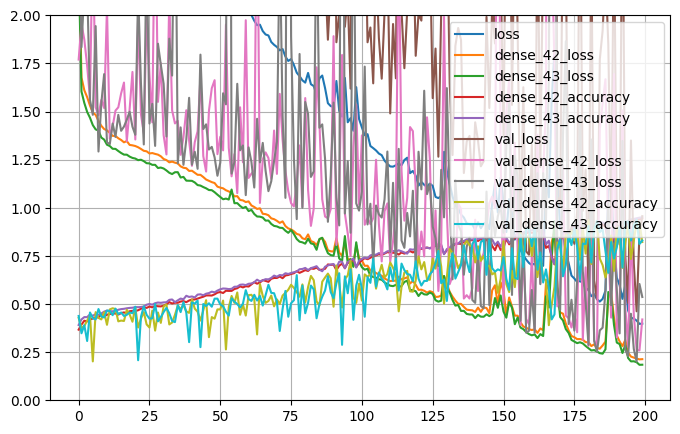

[[5. 4. 5. 5. 5. 7. 6. 6. 6. 6. 6. 5. 8. 6. 6. 8. 7. 9. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 49ms/step
[array([[6.11482468e-03, 2.50433944e-02, 3.14685583e-01, 3.69520456e-01,
        1.19703904e-01, 1.34386510e-01, 3.24723031e-03, 2.56152842e-02,
        1.36092817e-03, 6.14931878e-06, 4.26068073e-05, 6.02100481e-05,
        8.24028120e-06, 1.25040162e-06, 8.02561317e-07, 3.16050063e-07,
        9.89039677e-07, 1.63591309e-07, 1.08105404e-07, 1.06197353e-06,
        6.32170952e-07, 2.48633768e-07, 2.31543808e-07, 6.16017417e-07,
        1.67603858e-07, 1.11609870e-06, 3.03780951e-07, 4.21031132e-07,
        1.49203231e-07, 1.68848658e-07, 5.93271352e-07, 9.37930565e-07,
        4.56120148e-07, 1.22147284e-07, 1.71259529e-07, 1.52706662e-07,
        2.23751073e-07, 7.11291023e-07, 4.57204976e-07, 5.58186912e-07,
        6.09298297e-07, 3.16281898e-07, 2.33907741e-07, 3.89634522e-07,
        3.41122700e-07, 1.33933185e-07, 2.24461502e-07, 1.55625241e-06,
        1.791

In [ ]:
import keras as keras
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def le_arquivo(nome_arq):
    arq = open(nome_arq, 'r')  # abre o arquivo
    csvreader = csv.reader(arq, delimiter=";")
    headers = next(csvreader, None)
    rows = []
    for row in csvreader:
        rows.append(row)

    arq.close()

    rows = np.array(rows)

    rows = rows.astype(float)

    return rows


ct = le_arquivo('/content/drive/MyDrive/Classroom/Modelos de IA e Aprendizagem de Máquina/Datos_HT.csv')

num_padroes, num_atrib = ct.shape

# separação dos dados: x: notas de campo dos times
x = ct[:, 1:num_atrib - 2]
# y1: gols time casa, y2: gols time fora
y1 = ct[:, num_atrib - 2:num_atrib - 1]
y2 = ct[:, num_atrib - 1:num_atrib]

x_valid = x[:500]
y1_valid = y1[:500]
y2_valid = y2[:500]

model = keras.models.Sequential()
input1 = keras.layers.Input(shape=[num_atrib - 3])
hidden1 = keras.layers.Dense(1000, activation="relu")(input1)
hidden2 = keras.layers.Dense(1000, activation="relu")(hidden1)
output1 = keras.layers.Dense(500, activation="softmax")(hidden2)
output2 = keras.layers.Dense(500, activation="softmax")(hidden2)
model = keras.Model(inputs=[input1], outputs=[output1, output2])

ts = 200
lr = 0.015

optimizer = keras.optimizers.SGD(learning_rate=lr)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history = model.fit(x, [y1, y2], epochs=ts, validation_data=(x_valid, [y1_valid, y2_valid]))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

x_new = x[1:2, :]

print(x_new)

y_new = model.predict(x_new)

print(y_new)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
